<a href="https://colab.research.google.com/github/FNUAreena/fall-2025-group9/blob/Areena's-branch/capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Google Drive

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing libraries

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

Loading the csv file

In [70]:
file_path = "/content/drive/MyDrive/Capstone/fact_meal_day_clean.csv"
df = pd.read_csv(file_path)

creating day coloumn

In [71]:
df['date'] = pd.to_datetime(df[['year','month','day']])
df = df.set_index('date').sort_index()

Daily Participation

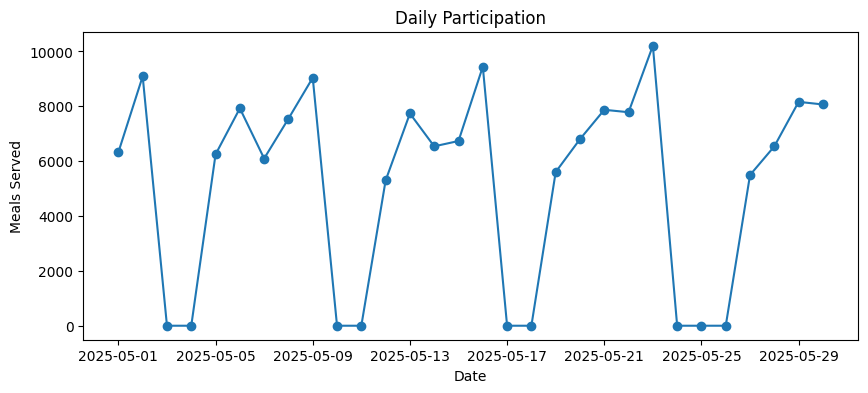

Highest Day: 2025-05-23 → 10208.0 meals
Lowest Day: 2025-05-03 → 0.0 meals
Average Daily: 5151.87 meals


In [72]:
daily = df['served_total'].resample('D').sum()

plt.figure(figsize=(10,4))
plt.plot(daily.index, daily.values, marker='o')
plt.title("Daily Participation")
plt.xlabel("Date")
plt.ylabel("Meals Served")
plt.show()

print("Highest Day:", daily.idxmax().date(), "→", daily.max(), "meals")
print("Lowest Day:", daily.idxmin().date(), "→", daily.min(), "meals")
print("Average Daily:", round(daily.mean(),2), "meals")


- Shows how many meals were served each day in May 2025.
* On average, about 5,100 meals are served each day.
* The highest day was May 23rd with 10,208 meals, showing a big peak.
* The lowest day was May 3rd with 0 meals, likely a weekend or holiday.
* The graph shows a clear pattern: participation drops to zero on some days (non-school days) and goes back up during school days.
* Overall, participation is steady on active days, with some peaks higher than usual.

Weekly Participation

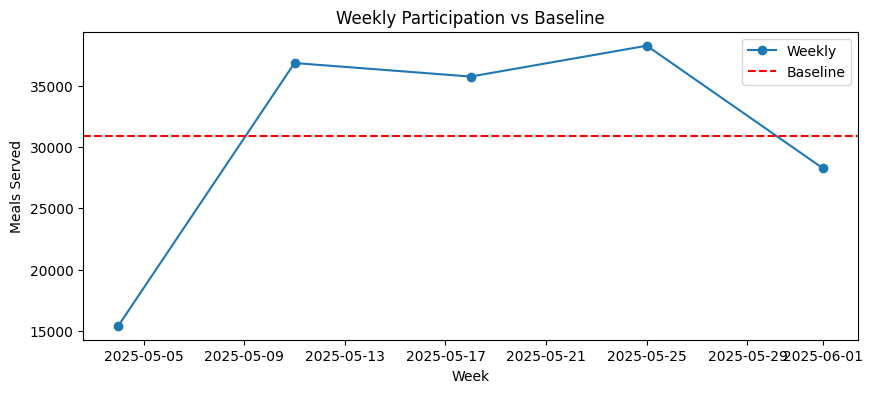


Weekly Participation:
date
2025-05-04    15416.0
2025-05-11    36856.0
2025-05-18    35752.0
2025-05-25    38268.0
2025-06-01    28264.0
Freq: W-SUN, Name: served_total, dtype: float64

Baseline (avg weekly): 30911.2


In [73]:
weekly = df['served_total'].resample('W').sum()
baseline = weekly.mean()

plt.figure(figsize=(10,4))
plt.plot(weekly.index, weekly.values, marker='o', label="Weekly")
plt.axhline(baseline, color='red', linestyle='--', label="Baseline")
plt.title("Weekly Participation vs Baseline")
plt.xlabel("Week")
plt.ylabel("Meals Served")
plt.legend()
plt.show()

print("\nWeekly Participation:")
print(weekly)
print("\nBaseline (avg weekly):", round(baseline,2))

- Groups meals per week and compares them to the baseline (average weekly meals).
* Weeks above the red line = good (above average).
* Weeks below the red line = poor (below average)
* The average weekly baseline is about 30,900 meals.
* The first week was much lower than baseline.
* Weeks in mid-May were well above baseline, showing strong participation.
* By early June, participation dropped below baseline again.
* This suggests school meal participation is highest mid-month and dips at the beginning and end of the cycle.

Distribution of Participation

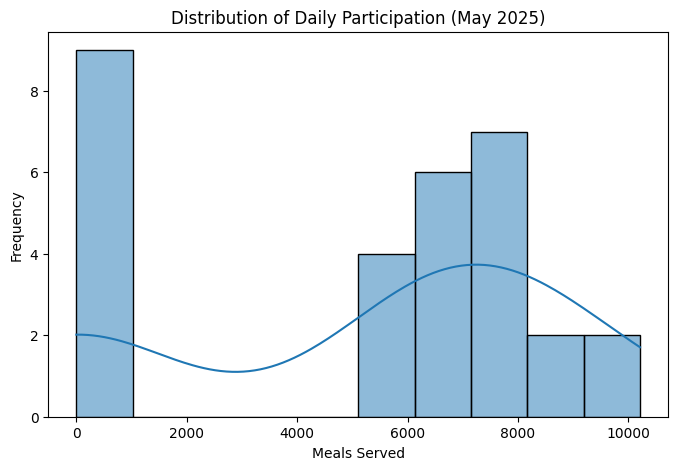

In [74]:
plt.figure(figsize=(8,5))
sns.histplot(daily, bins=10, kde=True)
plt.title("Distribution of Daily Participation (May 2025)")
plt.xlabel("Meals Served")
plt.ylabel("Frequency")
plt.show()



* The Histogram shows how daily meal participation is spread out in May 2025.
* Most days fall in the 6,000 - 8,000 meals range.
* A few days are very low (close to 0) — likely weekends or holidays.
* Only a few days reach the high end (9,000 - 10,000 meals).
* This means participation is fairly stable on school days, with big drops only on non-school days.

Day of Week Analysis

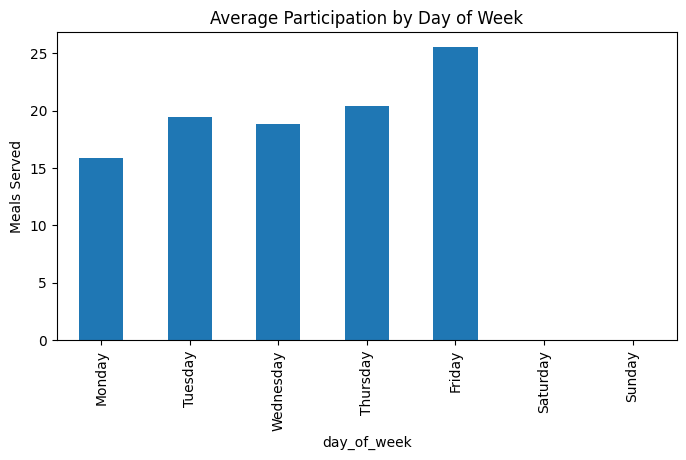

In [75]:
df['day_of_week'] = df.index.day_name()
dow_avg = df.groupby('day_of_week')['served_total'].mean().reindex(
    ["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
)

dow_avg.plot(kind='bar', figsize=(8,4), title="Average Participation by Day of Week")
plt.ylabel("Meals Served")
plt.show()


Groups meals by day of the week (Mon- Sun).

* Participation is lowest on Mondays, then gradually increases during the week.
* Fridays have the highest participation, showing peak meal demand before the weekend.
* Weekends show no participation (schools closed).
* This pattern suggests that meal participation is stronger later in the week compared to the start.

Participation vs Planned Meals

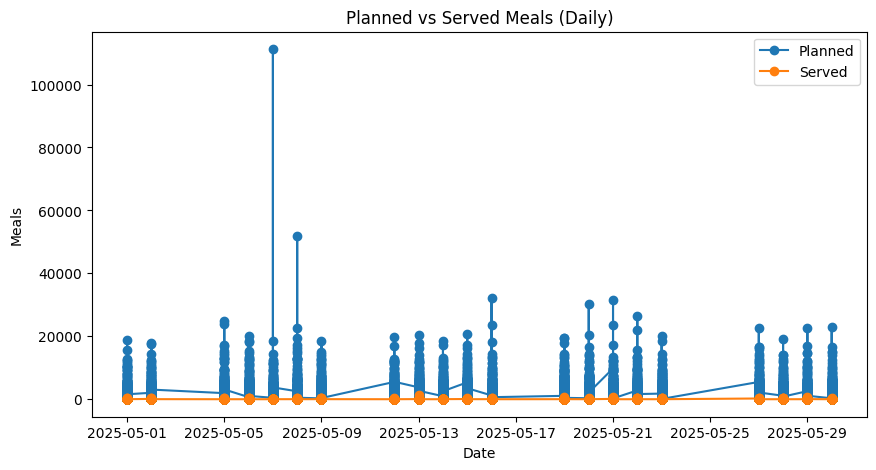

In [76]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df['planned_total'], label="Planned", marker='o')
plt.plot(df.index, df['served_total'], label="Served", marker='o')
plt.title("Planned vs Served Meals (Daily)")
plt.xlabel("Date")
plt.ylabel("Meals")
plt.legend()
plt.show()


- Compares what was planned vs what was actually served each day.

* The blue line (Planned) is almost always much higher than the orange line (Served).
* This means schools often planned more meals than were actually served, which could lead to waste.
* On some days, the gap is extremely large, showing inefficient planning.
* If orange (Served) ever goes above blue (Planned), that would mean shortages, but here it mostly shows overproduction.
* Insight: Planning needs to be adjusted closer to actual demand to reduce waste and improve efficiency.



Participation vs Cost per Meal

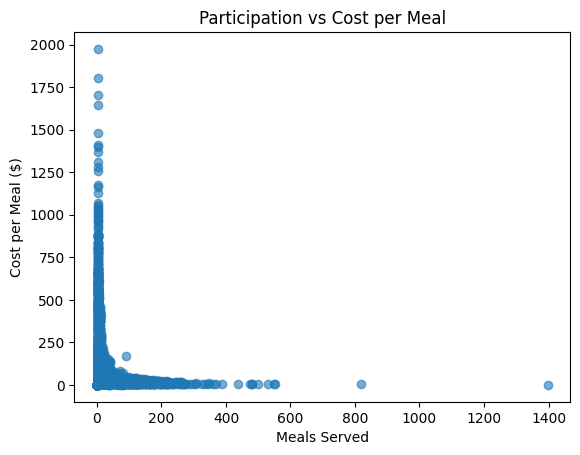

In [77]:
plt.scatter(df['served_total'], df['cost_per_meal'], alpha=0.6)
plt.title("Participation vs Cost per Meal")
plt.xlabel("Meals Served")
plt.ylabel("Cost per Meal ($)")
plt.show()


* The chart shows how the number of meals served relates to the cost per meal.
* When fewer meals are served, the cost per meal is very high.
* As more meals are served, the cost per meal drops → this shows economies of scale (serving more meals makes each one cheaper).
* Insight: Schools can reduce costs by increasing participation, since low turnout makes meals more expensive per student.

School or Region Comparison

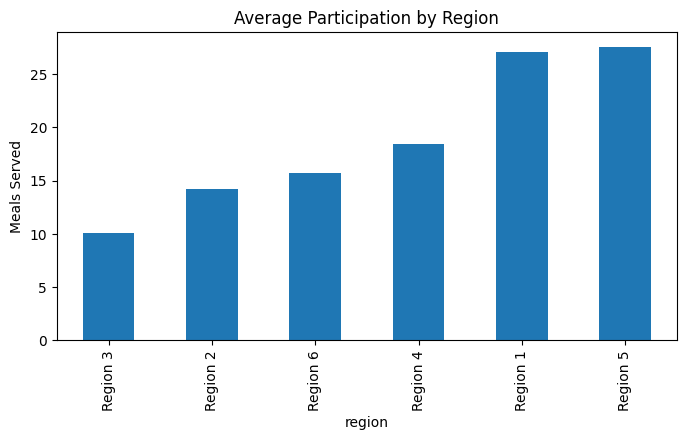

In [78]:
region_avg = df.groupby('region')['served_total'].mean().sort_values()
region_avg.plot(kind='bar', figsize=(8,4), title="Average Participation by Region")
plt.ylabel("Meals Served")
plt.show()



* The chart compares meal participation across different regions.
* Region 1 and Region 5 have the highest participation, showing stronger engagement.
* Region 3 has the lowest participation, meaning it is underperforming compared to others.
* Insight: This helps identify which regions are doing well and which may need support to improve meal participation.

Stability / Variability Check

In [81]:
# Weekly variability based on the DatetimeIndex
weekly_std = df['served_total'].resample('W').std()

# Keep only weeks that end within your dataset
weekly_std = weekly_std[weekly_std.index <= df.index.max()]

print("Weekly variability (higher = more unstable):")
print(weekly_std)



Weekly variability (higher = more unstable):
date
2025-05-04    41.922645
2025-05-11    42.271265
2025-05-18    50.471698
2025-05-25    49.911429
Freq: W-SUN, Name: served_total, dtype: float64



* The numbers show the standard deviation of meals served each week.
* A higher value means participation is more unstable and harder to predict.
* A lower value means participation is more steady and consistent.
Example: The week of May 18 (50.4) was more unstable than the week of May 4 (41.9).
* Insight: Weeks with high variability are harder to plan for and may cause more waste or shortages.

Correlation

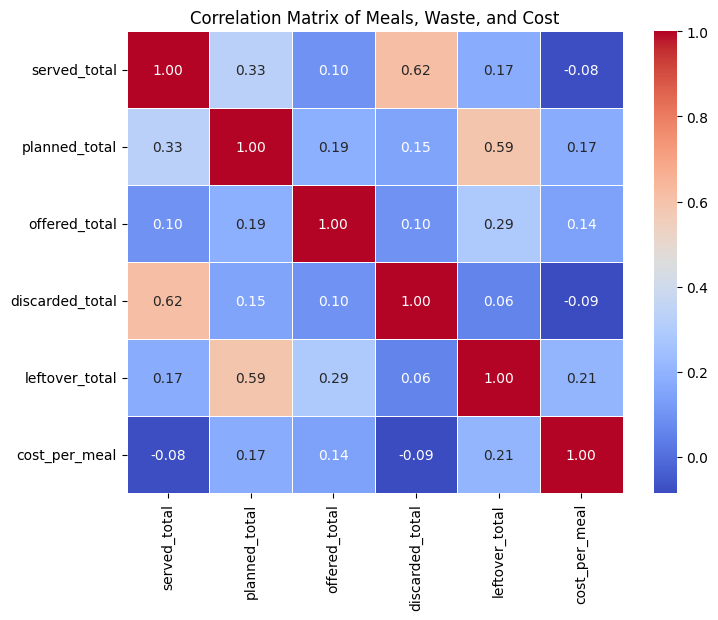

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numeric columns
num_cols = df[['served_total','planned_total','offered_total',
               'discarded_total','leftover_total','cost_per_meal']]

# Make correlation matrix
corr = num_cols.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Meals, Waste, and Cost")
plt.show()



* Served meals have a strong positive correlation with discarded meals (0.62) - when more meals are served, more waste also increases.
* Planned meals are positively linked with leftovers (0.59) - overplanning leads to more food left unused.
* Cost per meal has very weak or negative correlations with most variables - meaning costs are not strongly driven by participation alone (other factors affect it).
* Overall, the chart shows that waste is tied to both serving more meals and overplanning, which reduces efficiency.